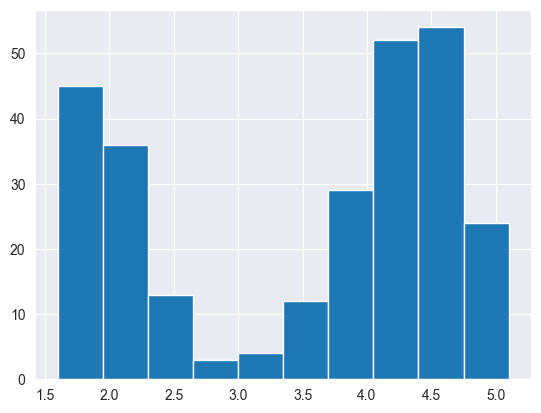

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.get_dataset_names()
utbrudd = sns.load_dataset('geyser')
# print(utbrudd)

# a)
plt.hist(utbrudd['duration'], bins=10)
plt.show()

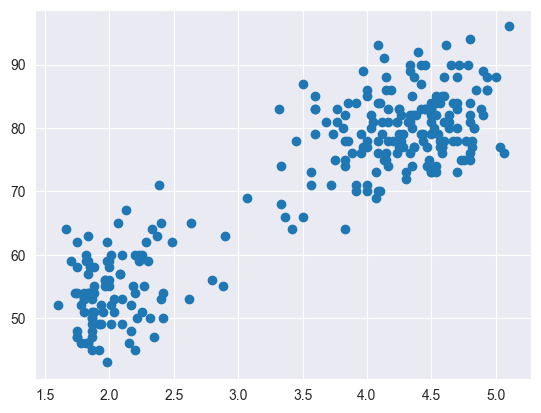

In [2]:
# b)
plt.scatter(utbrudd['duration'], utbrudd['waiting'])
plt.show()

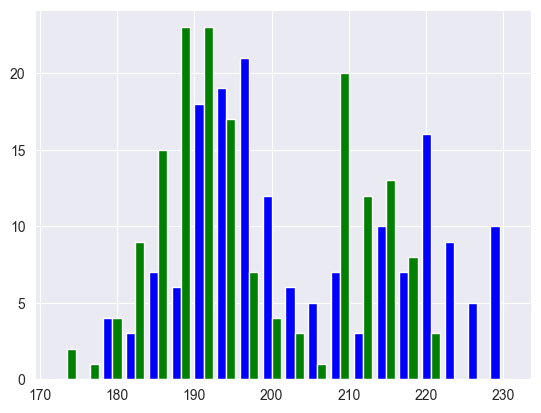

In [4]:
# c)
penguins = sns.load_dataset('penguins')
penguinsF = penguins[penguins['sex'] == 'Female']['flipper_length_mm']
penguinsf = penguins[penguins['sex'] == 'Female']['bill_length_mm']
penguinsM = penguins[penguins['sex'] == 'Male']['flipper_length_mm']
plt.hist([penguinsM, penguinsF], bins=20, color=['blue', 'green'])
plt.show()

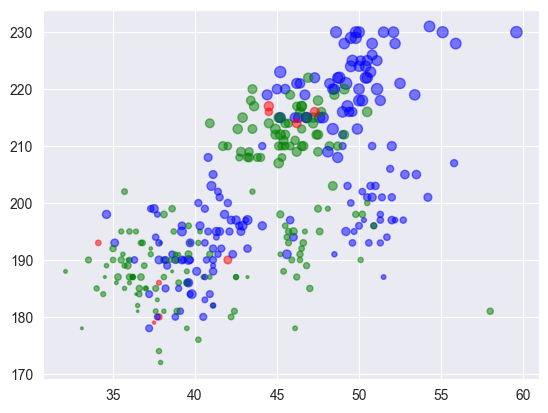

In [5]:
# d)
def farge(array):
    if array == 'Female': return 'green'
    if array == 'Male': return 'blue'
    return 'red'


minste = penguins['body_mass_g'].min()


def normalisert(vekt):
    if str(vekt) == 'nan': return 50
    return int(vekt - minste) / 50


vekter = [normalisert(x) for x in penguins['body_mass_g']]
farger = [farge(x) for x in penguins['sex']]

plt.scatter(penguins['bill_length_mm'], penguins['flipper_length_mm'], alpha=0.5, s=vekter, c=farger)
plt.show()

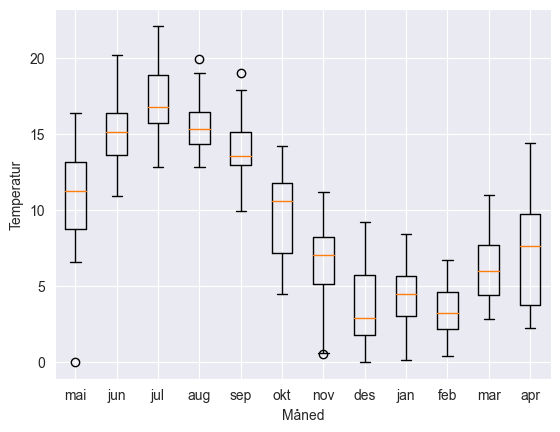

In [6]:
# Oppg 2)
vær = pd.read_csv('værÅr.csv', sep='\t')
data = []
måneder = []

for mnd in vær['Måned'].drop_duplicates():
    måneder.append(mnd)
    data.append(vær[vær['Måned'] == mnd]['Temp'])

plt.boxplot(data, labels=måneder)
plt.ylabel('Temperatur')
plt.xlabel('Måned')
plt.show()

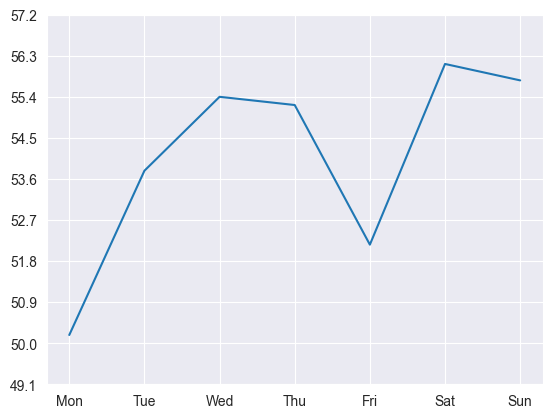

In [7]:
# Oppg 3
def c2f(c):
    return c * 1.8 + 32


vær = pd.read_csv('vær.csv', sep='\t')
temperaturer = vær['Temp']
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.plot(temperaturer)
plt.xticks(range(0, 7), days)
c, l = plt.yticks()
fl = [str(round(c2f(x), 1)) for x in c]
plt.yticks(c, fl)
plt.show()


<Axes: ylabel='antall'>

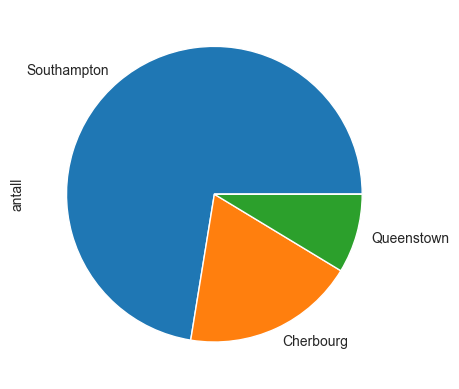

In [8]:
# Oppg 4 a)
titanic = sns.load_dataset('titanic')

havner = titanic['embark_town'].drop_duplicates()
antall = []

for h in havner:
    antall.append(titanic[titanic['embark_town'] == h].size)

ramme = pd.DataFrame({'havner': havner, 'antall': antall}, index=havner)
ramme['antall'].plot.pie()

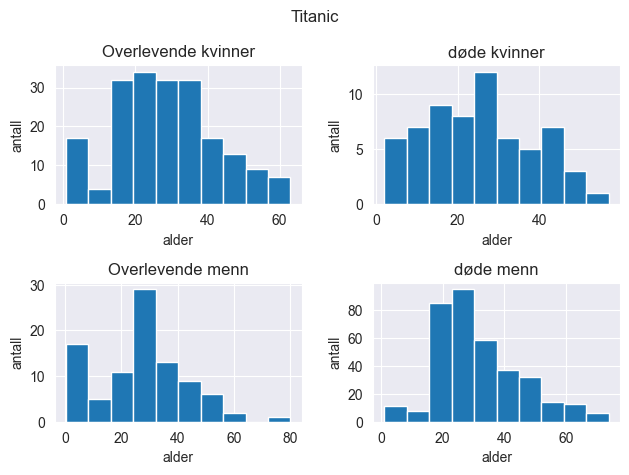

In [9]:
# b)

overlevende = titanic[titanic['survived'] == 1]
omkomne = titanic[titanic['survived'] == 0]

overlevendeMenn = overlevende[overlevende['sex'] == 'male']['age']
omkomneMenn = omkomne[omkomne['sex'] == 'male']['age']
overlevendeKvinner = overlevende[overlevende['sex'] == 'female']['age']
omkomneKvinner = omkomne[omkomne['sex'] == 'female']['age']

figur, ((levendeK, dødeK), (levendeM, dødeM)) = plt.subplots(2, 2)
figur.suptitle('Titanic')

levendeK.set_title('Overlevende kvinner')
levendeK.set_xlabel('alder')
levendeK.set_ylabel('antall')

levendeM.set_title('Overlevende menn')
levendeM.set_xlabel('alder')
levendeM.set_ylabel('antall')

dødeK.set_title('døde kvinner')
dødeK.set_xlabel('alder')
dødeK.set_ylabel('antall')

dødeM.set_title('døde menn')
dødeM.set_xlabel('alder')
dødeM.set_ylabel('antall')

levendeK.hist(overlevendeKvinner)
dødeK.hist(omkomneKvinner)
levendeM.hist(overlevendeMenn)
dødeM.hist(omkomneMenn)

figur.tight_layout()
plt.show()